<a href="https://colab.research.google.com/github/cynthialmy/Sentiment-Analysis-with-Scikit-learn/blob/main/Complete_Sentiment_Analysis_with_Scikit_learn_NLTK_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Sentiment Analysis

Sentiment analysis is a technique used in natural language processing (NLP) to identify and extract subjective information from text, such as opinions, attitudes, emotions, and feelings. Yelp is a platform where users can post reviews about businesses, products, and services. Therefore, analyzing Yelp data can provide valuable insights into customers' sentiments towards a particular business or product.


## Objectives

1. Collect and pre-process data from Yelp reviews of restaurants.
2. Perform sentiment analysis on the reviews to determine the overall sentiment towards the restaurants.
3. Train a machine learning model using scikit-learn to predict the review scores of restaurants.
4. Identify the strengths and weaknesses of the machine learning model and suggest areas for improvement.
5. Bonus: out-of-box techniques:
  - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
  - Roberta Pretrained Model from 🤗
  - Huggingface Pipeline

In [62]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
# Using the Natural Language Processing (NLP) library, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Sample of dataset

The data for this project will be collected from the Yelp API. The data will be pre-processed to remove any irrelevant information and to ensure that only the relevant information is used in the analysis.

All data set can be accessed and downloaded from Yelp Open Data Set [https://www.yelp.com/dataset/download].

In [63]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('https://raw.githubusercontent.com/cynthialmy/DataVizLab/main/yelp_dataset/yelp.csv')

In [64]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 10)


In [65]:
# COLUMN NAMES
print("Column names:")
print(data.columns)

Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [66]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)

Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object


In [67]:
# Take a look at the first few entries
print("Few dataset entries:")
data.head()

Few dataset entries:


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [68]:
# Summary of the dataset
data.describe(include='all')

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


# Preprocessing Yelp Data

Yelp data comes in unstructured format, so the first step is to preprocess the data. This includes cleaning the text, removing stop words, and tokenizing the words.

In [70]:
# CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


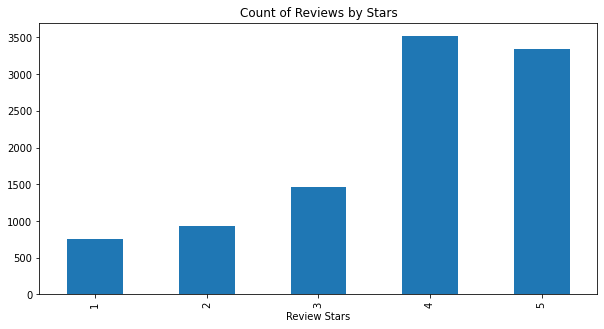

In [69]:
ax = data['stars'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

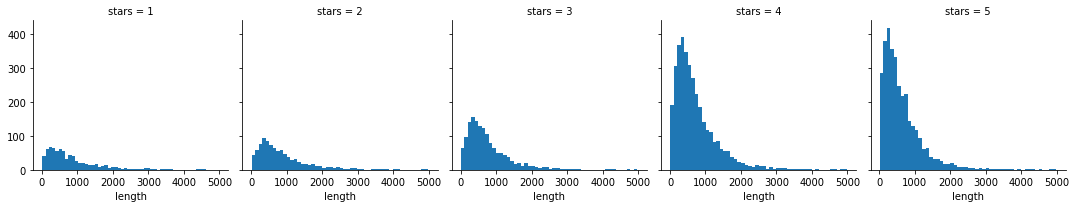

In [72]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50)

In [76]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [77]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


We can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  

We can say that the reviews marked cool tend to be short, not very useful to others and short.

Also, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    

Thus, we can say that longer reviews tend to be funny and useful.

In [171]:
# Classification in terms of negative (1 star), neutral (3 star), positive (5 star)
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(292, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


In [164]:
# print out an example of the review
example = data['text'][50]
print(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

In [172]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Cliff', 'notes', '-', 'Cheap', ':', '$', '1-2/plate', '-', 'Fast', ':']

In [173]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Cliff', 'NNP'),
 ('notes', 'NNS'),
 ('-', ':'),
 ('Cheap', 'NN'),
 (':', ':'),
 ('$', '$'),
 ('1-2/plate', 'JJ'),
 ('-', ':'),
 ('Fast', 'NN'),
 (':', ':')]

In [174]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Cliff/NNP)
  notes/NNS
  -/:
  (GPE Cheap/NN)
  :/:
  $/$
  1-2/plate/JJ
  -/:
  (GPE Fast/NN)
  :/:
  It/PRP
  's/VBZ
  ready-to-go/JJ
  and/CC
  on/IN
  a/DT
  conveyor/NN
  -/:
  (ORGANIZATION Acceptable/JJ)
  quality/NN
  :/:
  I/PRP
  'm/VBP
  here/RB
  weekly/RB
  and/CC
  have/VBP
  n't/RB
  gotten/VBN
  sick/JJ
  lol/NN
  This/DT
  place/NN
  is/VBZ
  definitely/RB
  good/JJ
  for/IN
  what/WP
  it/PRP
  is/VBZ
  ,/,
  ``/``
  it/PRP
  ''/''
  being/VBG
  a/DT
  budget-friendly/JJ
  sushi/NN
  place/NN
  that/WDT
  's/VBZ
  great/JJ
  for/IN
  a/DT
  quick/JJ
  bite/NN
  ./.
  In/IN
  a/DT
  response/NN
  to/TO
  the/DT
  lower-rating/JJ
  reviews/NNS
  stating/VBG
  how/WRB
  the/DT
  food/NN
  is/VBZ
  just/RB
  okay/VBN
  at/IN
  best/JJS
  or/CC
  authentic/JJ
  or/CC
  blah/JJ
  blah/NN
  blah/NN
  ,/,
  well/RB
  think/IN
  of/IN
  it/PRP
  like/IN
  wal-mart/JJ
  vs./FW
  */NN
  inserthighendretailerhere/RB
  */NNP
  ./.
  This/DT
  place/NN
  has/VBZ
  a/DT
  

In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [175]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print("length of the vocab is",len(vocab.vocabulary_))

length of the vocab is 5422


In [159]:
#     The data that we can see is the transformed words.
#     If we now get the feature's name - we can get the word back

print(vocab.get_feature_names_out()[1000:1500])

['Adult' 'Adults' 'Advisor' 'Advocate' 'Aegean' 'Aerobics' 'Aesthetically'
 'Affordable' 'Africa' 'Afterall' 'Afterdark' 'Afterward' 'Afterwards'
 'Agaves' 'Aged' 'Agent' 'Aggressive' 'Agree' 'Agua' 'Aguila' 'Agwa' 'Ah'
 'Ahab' 'Ahh' 'Ahha' 'Ahhh' 'Ahhhhh' 'Ahhhhhh' 'Ahi' 'Ahmazing'
 'Ahwahtukee' 'Ahwatukee' 'Ai' 'Aid' 'Aiellos' 'Aiko' 'Air' 'Airlines'
 'Airpark' 'Airport' 'Airwarys' 'Airways' 'Airwaysnever' 'Aisha' 'Aji'
 'Ajo' 'Akor' 'Al' 'Alabama' 'Aladdins' 'Alain' 'Alameda' 'Alan' 'Alas'
 'AlasIve' 'Alaska' 'Alaskan' 'Alaus' 'Albacore' 'Albeit' 'Alber'
 'Albertos' 'Albertsons' 'Alcatraz' 'Alcohol' 'Ale' 'Alemmmm' 'Alessias'
 'Alex' 'Alexa' 'Alexs' 'Alfalfa' 'Alfonso' 'Alfred' 'Alfredo' 'Ali'
 'Alice' 'Alicia' 'Alison' 'AllAmerican' 'AllStar' 'Allah' 'Allegiant'
 'Allen' 'Allende' 'Allergic' 'Allesias' 'Allison' 'Allow' 'Allstars'
 'Almond' 'Almost' 'Aloe' 'Aloft' 'Aloha' 'Along' 'Alongside' 'Alp'
 'Alphagraphics' 'Alpine' 'Already' 'Alright' 'Als' 'Also' 'Alterations'
 'Although' 

In [176]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (292, 5422)
Non-Zero occurences:  15574
Density of the matrix =  0.9836889789442302


In [177]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Building a Sentiment Classifier

In this step, you will train a machine learning model to classify Yelp reviews into positive, negative, or neutral sentiments. You can use a variety of models, such as Naive Bayes, Support Vector Machines (SVMs), or Recurrent Neural Networks (RNNs).

In [87]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
score_mnb = round(accuracy_score(y_test,predmnb)*100,2)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",score_mnb)
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
score_rmfr = round(accuracy_score(y_test,predrmfr)*100,2)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",score_rmfr)
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 23  29 110]
 [  1  98 193]
 [  1  20 635]]
Score: 68.11
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.14      0.25       162
           3       0.67      0.34      0.45       292
           5       0.68      0.97      0.80       656

    accuracy                           0.68      1110
   macro avg       0.75      0.48      0.50      1110
weighted avg       0.71      0.68      0.62      1110



In [89]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
score_dt = round(accuracy_score(y_test,preddt)*100,2)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",score_dt)
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 62  53  47]
 [ 33 149 110]
 [ 36 102 518]]
Score: 65.68
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.38      0.42       162
           3       0.49      0.51      0.50       292
           5       0.77      0.79      0.78       656

    accuracy                           0.66      1110
   macro avg       0.58      0.56      0.57      1110
weighted avg       0.65      0.66      0.65      1110



In [90]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
score_svm = round(accuracy_score(y_test,predsvm)*100,2)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",score_svm)
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



In [92]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
score_knn = round(accuracy_score(y_test,predknn)*100,2)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",score_knn)
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



In [106]:
print('Multinomial Naive Bayes = ',score_mnb,'%') 
print('Support Vector Machine = ',score_svm,'%') 
print('Random Forest Classifier = ',score_rmfr,'%') 
print('Decision Tree = ',score_dt,'%') 
print('K Neighbor Classifier = ',score_knn,'%') 

Multinomial Naive Bayes =  76.94 %
Gradient Boosting Classifier =  73.78 %
Support Vector Machine =  71.08 %
Random Forest Classifier =  68.11 %
Decision Tree =  65.68 %
K Neighbor Classifier =  61.35 %


In [107]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating:")
print(data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:
5
Predicted Rating:


5

In [97]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating:")
print(data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mnb.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [98]:
# NEGATIVE REVIEW
nr = data['text'][23]
print(nr)
print("Actual Rating:")
print(data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mnb.predict(nr_t)[0]

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Actual Rating:
1
Predicted Rating:


1

## Bias in dataset
In the data count below, we can see that predictions are biased towards positive reviews. It is possible that the dataset has more positive reviews as compared to negative reviews.
This can likely be fixed by normalizing the dataset to have equal number of reviews - thereby removing the bias.

In [99]:
count = data['stars'].value_counts()
print(count)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


# Bonus - using out-of-box techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [108]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [115]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [116]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [117]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [118]:
sia.polarity_scores(example)

{'neg': 0.056, 'neu': 0.77, 'pos': 0.173, 'compound': 0.9889}

In [121]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['text']
    myid = row['business_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [123]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'business_id'})
vaders = vaders.merge(data, how='left')

In [124]:
# Now we have sentiment score and metadata
vaders.head()

,business_id,neg,neu,pos,compound,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,0.027,0.768,0.205,0.8779,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,9yKzy9PApeiPPOUJEtnvkg,0.027,0.768,0.205,0.8779,2011-04-20,4nvfVCoIDBhEiQdvXh1xoA,2,Finally was able to make it here for breakfast...,review,gXmtPKLWPZJeJX_KPw54HA,0,2,0,1116
2,9yKzy9PApeiPPOUJEtnvkg,0.027,0.768,0.205,0.8779,2012-05-08,VQqwoz4s-xYwGoqJDASTfg,2,:( I really wanted to like this place. I thoro...,review,BvjSQAFcROLp27QjaRcyoA,0,1,1,669
3,9yKzy9PApeiPPOUJEtnvkg,0.027,0.768,0.205,0.8779,2012-06-03,PiR7lltpkA4GP8gAeCJYIg,4,"Loved the scenic restaurant, right in the midd...",review,5qa1hx5GVHehlBQx0b5gFw,0,0,0,94
4,9yKzy9PApeiPPOUJEtnvkg,0.027,0.768,0.205,0.8779,2011-11-04,2Nci3cdKa0t32NeolLOfQA,5,Beautiful country setting in Phoenix on an old...,review,nprSBcvBhvzyIbacEwzDLQ,0,0,0,427


## Plot VADER results

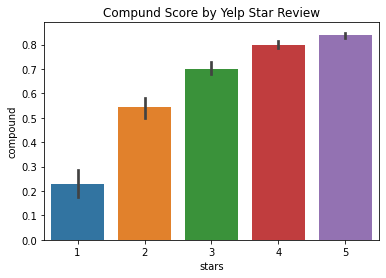

In [128]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Yelp Star Review')
plt.show()

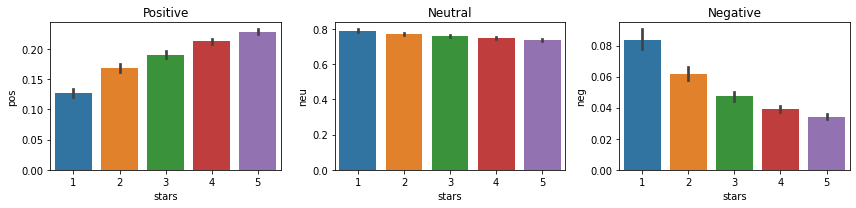

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [130]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.4 MB/s eta 0:00:00


In [131]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [132]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [133]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Cliff notes
- Cheap: $1-2/plate
- Fast: It's ready-to-go and on a conveyor
- Acceptable quality: I'm here weekly and haven't gotten sick lol

This place is definitely good for what it is, "it" being a budget-friendly sushi place that's great for a quick bite.  In a response to the lower-rating reviews stating how the food is just okay at best or authentic or blah blah blah, well think of it like wal-mart vs. *inserthighendretailerhere*.  This place has a business model based on selling in large volumes (hence the low prices like wal-mart) so they're gonna have to "reduce costs" somehow (so-so quality food, not-so-attentive staff, and slightly smaller than average portions), but it's still a solid bang-for-your-buck kinda place.

On top of this, I can be in and out quickly since everything is already prepared, perfect for those quick 30 min lunch breaks.  All that's required is for you to grab it off the conveyor (depending on whether or not all the items you want are on the conveyor at

{'neg': 0.056, 'neu': 0.77, 'pos': 0.173, 'compound': 0.9889}

In [142]:
data = data.head(500)

In [143]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.024074964, 'roberta_neu': 0.30235398, 'roberta_pos': 0.67357105}


In [144]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [145]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['text']
        myid = row['business_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 7SO_rX1F6rQEl-5s3wZxgQ
Broke for id FCcFT610nQBVcRdY-devQA
Broke for id d7_jkx0VPx3uHsUl18iHMQ
Broke for id LzpR_jE6VIutJ08s2cdRrw
Broke for id 1621ir5mjVgbHwxCbMAEjg
Broke for id l3yL2rQ6PoFBQ06RLczn9w
Broke for id EGiGWZp_zSqdeftiFQ7MbA
Broke for id vxPPpj5jJKO8DtapF5S-NQ
Broke for id qjmCVYkwP-HDa35jwYucbQ
Broke for id bO2rQLEntQLcg675LjEqaA
Broke for id 3GAPcBG8SowgrpS6UHlDeQ
Broke for id Xq9tkiHhyN_aBFswFeGLvA
Broke for id c1yGkETheht_1vjda7G5sA
Broke for id RtApx92iFX4n-e1VlQlkmQ
Broke for id XTIIAZspxssIF7WenlXmrA


In [147]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'business_id'})
results_df = results_df.merge(data, how='left')

# Step 3. Compare Scores between models

In [148]:
results_df.columns

Index(['business_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'date', 'review_id',
       'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny',
       'length'],
      dtype='object')

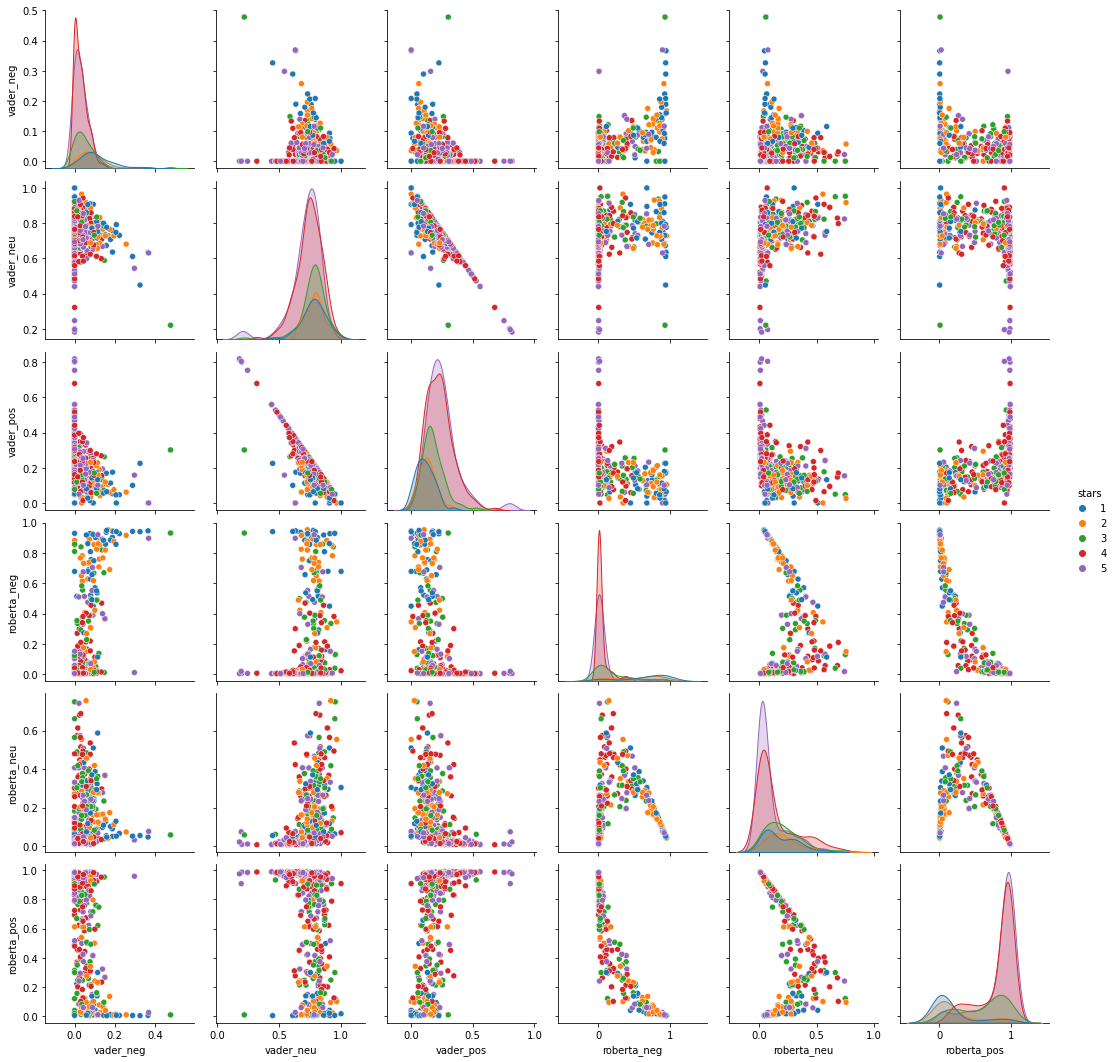

In [150]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

# Step 4: Review Examples

## Positive sentiment 1-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [151]:
results_df.query('stars == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

"Yikes, reading other reviews I realize my bad experience wasn't unique. As a server I make a very laid back customer. I like pretty much everything I eat and don't require a lot of attention from the waiter. \n\nLa Piccola Cucina would benefit from just one extra person in the front of the house. Our guy, though adorable and friendly, was too busy to refill our drinks and to remember to bring our appetizer (though charged us for it). The ahi tuna (highly recommended over the other fish options he said) was so overcooked it was the color and consistency of chicken. Like other reviewers mentioned, he was frantic and made that clear to every customer. At one point I even saw him in the kitchen cooking - they need another person! \n\nI left super stressed out from the experience, which is very, very unusual for me. You can either have bad service or bad food, but not both."

In [152]:
results_df.query('stars == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

"Yikes, reading other reviews I realize my bad experience wasn't unique. As a server I make a very laid back customer. I like pretty much everything I eat and don't require a lot of attention from the waiter. \n\nLa Piccola Cucina would benefit from just one extra person in the front of the house. Our guy, though adorable and friendly, was too busy to refill our drinks and to remember to bring our appetizer (though charged us for it). The ahi tuna (highly recommended over the other fish options he said) was so overcooked it was the color and consistency of chicken. Like other reviewers mentioned, he was frantic and made that clear to every customer. At one point I even saw him in the kitchen cooking - they need another person! \n\nI left super stressed out from the experience, which is very, very unusual for me. You can either have bad service or bad food, but not both."

## Negative sentiment 5-Star Reviews

In [153]:
results_df.query('stars == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

"I honestly have only positive things to say about Postino's since every one of my visits here has been very pleasant. From the valet who is running his ass off to the food and everything in between, this place does it all right! If you go here hungry, you should know that your options are basically a panini, a salad or some bruschetta. I've had a little bit of everything and for the value and quality you can't go wrong the the bruschetta. I recently determined my favorite to be the ricotta, dates and pistachio but a close second is the salami and pesto.\n\nWine by the glass can be a bit steep so if you're planning to stay for a bit and can agree on a style with your company, you might be better off getting a bottle. A bottle is pretty much 3x the price of a glass so you end up getting 1 1/2 glasses extra. Bonus!\n\nSomeday, I'll actually take advantage of their $20 deal for wine and bruschetta!"

In [154]:
results_df.query('stars == 5') \
    .sort_values('vader_neg', ascending=False)['text'].values[0]

"I honestly have only positive things to say about Postino's since every one of my visits here has been very pleasant. From the valet who is running his ass off to the food and everything in between, this place does it all right! If you go here hungry, you should know that your options are basically a panini, a salad or some bruschetta. I've had a little bit of everything and for the value and quality you can't go wrong the the bruschetta. I recently determined my favorite to be the ricotta, dates and pistachio but a close second is the salami and pesto.\n\nWine by the glass can be a bit steep so if you're planning to stay for a bit and can agree on a style with your company, you might be better off getting a bottle. A bottle is pretty much 3x the price of a glass so you end up getting 1 1/2 glasses extra. Bonus!\n\nSomeday, I'll actually take advantage of their $20 deal for wine and bruschetta!"

# Extra: The Transformers Pipeline
Quick & easy way to run sentiment predictions

In [155]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [156]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [157]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [158]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

# The End